In [1]:
import numpy as np
import pandas as pd

input_file = "./../Sample/train.csv"
mnist = pd.read_csv(input_file, header = 0)

pd.DataFrame.head(mnist, 10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X, y = mnist.iloc[0:, 1:], mnist.iloc[0:, 0]

X.shape

(42000, 784)

In [3]:
y.shape

(42000,)

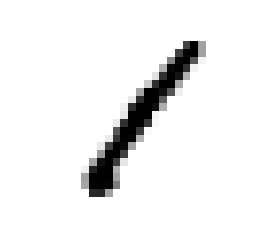

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[0, :]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X.iloc[:32000, :], X.iloc[32000:, :], y.iloc[:32000], y.iloc[32000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn import svm


svc = svm.SVC(kernel='linear', C = 1.0)
svc.fit(X_train, y_train_5)

In [ ]:
svc.predict([X.iloc[8,:]])

In [ ]:
some_digit = X.iloc[32017, :]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
svc.predict([X.iloc[32017, :]])

In [ ]:
svc.fit(X, y)

In [ ]:
test_input_file = "./../Sample/test.csv"
test_mnist = pd.read_csv(test_input_file, header = 0)

pd.DataFrame.head(test_mnist, 10)

In [ ]:
results = svc.predict(test_mnist)
results

In [ ]:
some_digit = test_mnist.iloc[4, :]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
row = range(1, results.size + 1)
result_df = pd.DataFrame({
    'ImageId': row,
    'Label': results
})

result_df[['ImageId', 'Label']].to_csv('./svc_results.csv', sep = ',', index = False, encoding = 'utf-8')